In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.integrate import quad
import warnings
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#The formulas to get the extra factor of g*s
def integrate_boson(temp, mass, prefactor):
    function_boson = lambda u: prefactor*15/(np.pi)**4*(u**2-(mass/temp)**2)**(1/2)*(u**2-(1/4)*(mass/temp)**2)/(np.exp(u)-1)
    answer_boson, error = integrate.quad(function_boson, mass/temp, np.inf)
    return answer_boson, error

def integrate_fermion(temp, mass, prefactor):
    function_fermion = lambda u: prefactor*15/(np.pi)**4*(u**2-(mass/temp)**2)**(1/2)*(u**2-(1/4)*(mass/temp)**2)/(np.exp(u)+1)
    answer_fermion, error = integrate.quad(function_fermion, mass/temp, np.inf) 
    return answer_fermion, error

32
32
32
7780


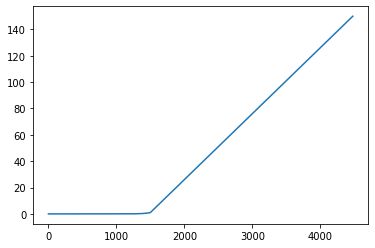

In [3]:
#The rest masses, number of helicity states, boson/fermion, and temperature range
masses_lower = [0, 0, 0.51, 106, 135, 140]
masses_SM_upper = [0, 0, 0, 0.51, 106, 5, 9, 115, 1.3*10**3, 1.8*10**3, 4.4*10**3, 80*10**3, 91*10**3, 114*10**3, 174*10**3]
masses_SUSY = 10*[10**7]+7*[10**8]
masses_upper = masses_SM_upper + masses_SUSY
print(len(masses_upper))
#Just use order of list as in paper

helicities_lower = [2, 6, 4, 4, 2, 1]
helicities_SM_upper = [2, 6, 16, 4, 4, 12, 12, 12, 12, 4, 12, 6, 3, 1, 12]
helicities_SUSY = [2, 6, 4, 4, 2, 1, 16, 12, 12, 12, 12, 4, 12, 6, 3, 1, 12]
helicities_upper = helicities_SM_upper + helicities_SUSY
print(len(helicities_upper))

boson_lower = [True, False, False, False, True, True]
boson_SM_upper = [True, False, True, False, False, False, False, False, False, False, False, True, True, True, False]
boson_SUSY = [False, True, True, True, False, False, False, True, True, True, True, True, True, False, False, False, True]
boson_upper = boson_SM_upper + boson_SUSY
print(len(boson_upper))

"""
temp_lower1 = np.arange(10**(-4), 1, 10**(-4))
temp_lower2 = np.arange(1, 150, 0.05)
temp_lower_tot = np.append(temp_lower1, temp_lower2)
temp_upper1 = np.arange(200, 10**6, 200)
temp_upper2 = np.arange(10**6, 10**9, 1.5*10**5)
temp_upper_tot = np.append(temp_upper1, temp_upper2)
"""
temp_lower1 = np.logspace(-7, 0, 1500)
temp_lower2 = np.arange(1, 150, 0.05)
temp_lower_tot = np.append(temp_lower1, temp_lower2)
temp_upper1 = np.append(np.arange(200, 1000, 1),np.logspace(3, 6, 1000))
temp_upper2 = np.logspace(6, 10, 1500)
temp_upper_tot = np.append(temp_upper1, temp_upper2)
print(len(temp_lower_tot)+len(temp_upper_tot))
plt.plot(temp_lower_tot)
plt.show()

In [4]:
s_dof_lower = np.zeros(len(temp_lower_tot))
errors_lower = np.zeros(len(temp_lower_tot)*len(boson_lower))
error_now_lower = 0

for i in np.arange(0,len(boson_lower)):
    if boson_lower[i] == True:
        for j in np.arange(0,len(temp_lower_tot)):
            lower_boson, new_error_boson = integrate_boson(temp_lower_tot[j], masses_lower[i], helicities_lower[i])
            s_dof_lower[j] += lower_boson
            errors_lower[error_now_lower] = new_error_boson

    else:
        for j in np.arange(0,len(temp_lower_tot)):
            nu_upper_bound = 3 #MeV
            nu_lower_bound = 1 #MeV
            if i == 1 and nu_lower_bound < temp_lower_tot[j] < nu_upper_bound: 
                neutrino, new_error_fermion = integrate_fermion(temp_lower_tot[j], masses_lower[i], helicities_lower[i])
                lower_bound = (4/11)**(3/3)
                upper_bound = 1
                scaled_temp = (temp_lower_tot[j] - nu_lower_bound) / (nu_upper_bound - nu_lower_bound)
                a = lower_bound + (upper_bound - lower_bound) / (1 + np.exp(-15 * (scaled_temp - 0.5)))
                s_dof_lower[j]+= a*neutrino           
            elif i == 1 and temp_lower_tot[j] <= nu_lower_bound:
                neutrino, new_error_fermion = integrate_fermion(temp_lower_tot[j], masses_lower[i], helicities_lower[i])
                s_dof_lower[j]+=(4/11)**(3/3)*neutrino
            elif i == 1 and temp_lower_tot[j] >= nu_upper_bound:
                neutrino, new_error_fermion = integrate_fermion(temp_lower_tot[j], masses_lower[i], helicities_lower[i])
                s_dof_lower[j]+=neutrino
            else:
                lower_fermion, new_error_fermion = integrate_fermion(temp_lower_tot[j], masses_lower[i], helicities_lower[i])
                s_dof_lower[j]+=lower_fermion
            errors_lower[error_now_lower] = new_error_fermion
    error_now_lower+=1

C:\Users\Annet\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Annet\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


In [5]:
temperature_extra = np.logspace(-9, -7, 200)
s_dof_extra = len(temperature_extra)*[s_dof_lower[0]]
print(s_dof_lower)

[ 3.90909091  3.90909091  3.90909091 ... 16.71551588 16.71583181
 16.71614746]


In [6]:
#Combine the different ranges
df_SM = pd.read_csv('dof_SM_SUSY2.csv')
dof_SM = df_SM['dof']
temperature_SM = df_SM['temperature']
entropy_dof_SM = np.append(s_dof_extra, np.append(s_dof_lower,dof_SM[len(temp_lower_tot)+len(temperature_extra):]))

In [8]:
#Write data to a panda file called 's_dof_SM.csv', with columns of the dof, the temperature and the time
#The temperature and time are the same as for g*

s_dof_SM_panda = pd.DataFrame(list(zip(np.transpose(entropy_dof_SM), np.transpose(temperature_SM))), columns=['s_dof', 'temperature'])
s_dof_SM_panda.to_csv('s_dof_SM_SUSY2.csv', index=False)

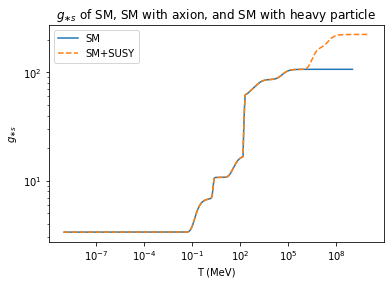

In [8]:
#Plot the entropy dof of SM, SM+axion, and SM+heavy
s_df_SM = pd.read_csv('s_dof_SM.csv')
s_df_SUSY = pd.read_csv('s_dof_SM_SUSY.csv')
plt.plot(s_df_SM['temperature'], s_df_SM['s_dof'], label='SM')
plt.plot(s_df_SUSY['temperature'], s_df_SUSY['s_dof'], label='SM+SUSY', linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('T (MeV)')
plt.ylabel(r'$g_{\ast s}$')
plt.title(r'$g_{\ast s}$ of SM, SM with axion, and SM with heavy particle')
plt.legend()
plt.show()